# Visualizing DESI spectra

In [30]:
# SPARCL imports
from sparcl.client import SparclClient

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from specutils import Spectrum1D
from astropy.nddata import InverseVariance
from astropy.convolution import convolve, Gaussian1DKernel
from astropy.io import fits
%matplotlib inline

# Data Lab imports
from dl import queryClient as qc
from dl import authClient as ac
from getpass import getpass

# plots default setup
font = 12
plt.rcParams.update({
    'font.family': 'DejaVu Sans',  # ou Helvetica se estiver instalada
    'text.usetex': True,
    'font.size': font,
    'axes.titlesize': font,
    'axes.labelsize': font,
    'xtick.labelsize': font,
    'ytick.labelsize': font,
    'legend.fontsize': font,
    'figure.titlesize': font,
    'font.sans-serif': ['Helvetica'],
    'figure.figsize': (14, 8)
})

In [31]:
client = SparclClient()

In [32]:
sorted(client.get_all_fields(dataset_list=['DESI-DR1']))

['bgs_target',
 'chi2',
 'cmx_target',
 'coadd_fiberstatus',
 'coadd_numexp',
 'coadd_numnight',
 'coadd_numtile',
 'coeff',
 'data_release',
 'datasetgroup',
 'dateobs',
 'dateobs_center',
 'dec',
 'deltachi2',
 'desi_target',
 'desiname',
 'exptime',
 'fa_target',
 'fa_type',
 'flux',
 'healpix',
 'instrument',
 'ivar',
 'main_nspec',
 'main_primary',
 'mask',
 'mean_delta_x',
 'mean_delta_y',
 'mean_fiber_dec',
 'mean_fiber_ra',
 'mean_mjd',
 'mean_psf_to_fiber_specflux',
 'model',
 'mws_target',
 'ncoeff',
 'npixels',
 'numobs_init',
 'objtype',
 'obsconditions',
 'plate_dec',
 'plate_ra',
 'pmdec',
 'pmra',
 'priority_init',
 'program',
 'ra',
 'redshift',
 'redshift_err',
 'redshift_warning',
 'ref_epoch',
 'rms_delta_x',
 'rms_delta_y',
 'scnd_target',
 'site',
 'sparcl_id',
 'specid',
 'specprimary',
 'spectype',
 'spgrpval',
 'std_fiber_dec',
 'std_fiber_ra',
 'subpriority',
 'subtype',
 'survey',
 'sv1_bgs_target',
 'sv1_desi_target',
 'sv1_mws_target',
 'sv1_scnd_target',
 '

In [33]:
out = ['sparcl_id', 'ra', 'dec', 'redshift', 'spectype', 'objtype', 'data_release', 'redshift_err', 'desiname', 'healpix', 'survey', 'program', 'zcat_nspec', 'targetid']
cons = {'spectype': ['GALAXY'],
        'redshift': [0.01, 0.02],
        'ra': [21., 21.5],
        'dec': [-2, -1],
        'data_release': ['DESI-DR1']}

In [34]:
found_I = client.find(outfields=out, constraints=cons, limit=100)

In [35]:
# Define the fields to include in the retrieve function
inc = ['sparcl_id', 'specid', 'targetid', 'data_release', 'redshift', 'flux',
       'wavelength', 'model', 'ivar', 'mask', 'spectype', 'ra', 'dec']

In [36]:
ids_I = found_I.ids
results_I = client.retrieve(uuid_list=ids_I, include=inc)
results_I.info

{'status': {'success': True,
  'info': ["Successfully found 57 records in dr_list={'DESI-EDR', 'DESI-DR1', 'SDSS-DR16', 'BOSS-DR16'}"],
  'warnings': []}}

In [37]:
results_I.records[0]

{'ra': 21.228825372963236,
 'dec': -1.1084268193601554,
 'spectype': 'GALAXY',
 'specid': 39627760922008965,
 'data_release': 'DESI-DR1',
 'sparcl_id': '6153c342-86ab-11ef-92b1-525400f334e1',
 'redshift': 0.016916676858855735,
 'targetid': 39627760922008965,
 'model': array([0.53785926, 0.73700595, 0.7699188 , ..., 1.24443257, 1.16377926,
        0.77033514]),
 'mask': array([0, 0, 0, ..., 0, 0, 0]),
 'wavelength': array([3600. , 3600.8, 3601.6, ..., 9822.4, 9823.2, 9824. ]),
 'ivar': array([0.02750569, 0.0249123 , 0.01926784, ..., 3.56454301, 3.99925709,
        5.18924952]),
 'flux': array([3.0301168 , 0.87963134, 3.14060473, ..., 0.98094934, 1.08410633,
        1.64446366]),
 '_dr': 'DESI-DR1'}

In [38]:
ra = 21.1344464
dec = -1.1989768
z = 0.0166574

In [39]:
for obj in results_I.records:
    print(obj.ra, obj.dec, obj.redshift, obj.specid, obj.targetid)
    # print(f"Checking record with ID: {obj.sparcl_id}")
    # print(type(obj.ra))
    if (np.isclose(obj.ra, ra, atol=0.001)) and (np.isclose(obj.dec, dec, atol=0.001)) and (np.isclose(obj.redshift, z, atol=0.001)):
        print(f"Found matching record with ID: {obj.sparcl_id}")
        # break

21.228825372963236 -1.1084268193601554 0.016916676858855735 39627760922008965 39627760922008965
21.13415464565162 -1.198839663702569 0.016808103101930715 39627754882208676 39627754882208676
Found matching record with ID: 616ccd57-86ab-11ef-8a41-525400f334e1
21.434499374378433 -1.4566872688991543 0.017453413217718133 39627748846606870 39627748846606870
21.44725089552137 -1.3721309141416098 0.018865893509290136 39627754886404990 39627754886404990
21.458354024876357 -1.2927713607919524 0.01763187958322455 39627754886405472 39627754886405472
21.379795497131443 -1.4081752765217868 0.016332001293307967 39627748846604782 39627748846604782
21.21893510177442 -1.2401465738773019 0.017628372326804895 39627754882211789 39627754882211789
21.376666257176375 -1.410091493090241 0.016996058534631323 39627748846604668 39627748846604668
21.448740888539128 -1.344568584514219 0.018452815795455768 39627754886405061 39627754886405061
21.451050118824604 -1.3809186223062615 0.015877788581736576 396277488466074

In [40]:
specs = [Spectrum1D(spectral_axis = r.wavelength*u.AA,
                    flux = np.array(r.flux)* 10**-17 * u.Unit('erg cm-2 s-1 AA-1'),
                    uncertainty = InverseVariance(np.array(r.ivar)),
                    redshift = r.redshift,
                    mask = r.mask)
        for r in results_I.records]
print(specs[0])

Spectrum1D (length=7781)
Flux=[3.03011680e-17 8.79631341e-18 3.14060473e-17 ... 9.80949342e-18
      1.08410633e-17 1.64446366e-17] erg / (Angstrom s cm2),  mean=0.00000 erg / (Angstrom s cm2)
Spectral Axis=[3600.  3600.8 3601.6 ... 9822.4 9823.2 9824. ] Angstrom,  mean=6712.00000 Angstrom
Uncertainty=InverseVariance ([0.02750569 0.0249123  0.01926784 ... 3.56454301 3.99925709 5.18924952] cm4 Angstrom2 s2 / erg2)


In [41]:
spec = fits.open('spec-0399-51817-0207.fits')
spec[1].data

flux    = spec[1].data['flux']
loglam  = spec[1].data['loglam']
ivar    = spec[1].data['ivar']
mask    = spec[1].data['and_mask']

flux_error = 1 / np.sqrt(ivar)
lamb = 10**loglam

In [42]:
def plot_spec(index, results):
    """
    Pass an index value and the output from using client.retrieve()
    to plot the spectrum at the specified index.
    """
    
    record = results.records[index]

    sparcl_id = record.sparcl_id
    data_release = record.data_release
    flux = record.flux
    wavelength = record.wavelength
    model = record.model
    spectype = record.spectype
    redshift = record.redshift
    ra = record.ra
    dec = record.dec

    plt.title(f"Data Set = {data_release}\n"
              f"Type = {spectype}\n"
              f"ID = {sparcl_id}\n"
              f"Redshift = {redshift}\n"
              f"RA = {ra}\n"
              f"Dec = {dec}", loc='left')
    plt.xlabel('wavelength $[\AA]$')
    plt.ylabel('$f_{\lambda}$ $(10^{-17}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1})$')
    
    # Plot unsmoothed spectrum in grey
    plt.plot(wavelength, flux, color='k', alpha=0.2, label='Unsmoothed spectrum')
    
    # Overplot spectrum smoothed using a 1-D Gaussian Kernel in black
    plt.plot(wavelength, convolve(flux, Gaussian1DKernel(5)), color='k', label='Smoothed spectrum')
    
    # Overplot the model spectrum in red
    plt.plot(wavelength, model, color='r', label='Model spectrum')
    
    plt.legend()
    plt.show()

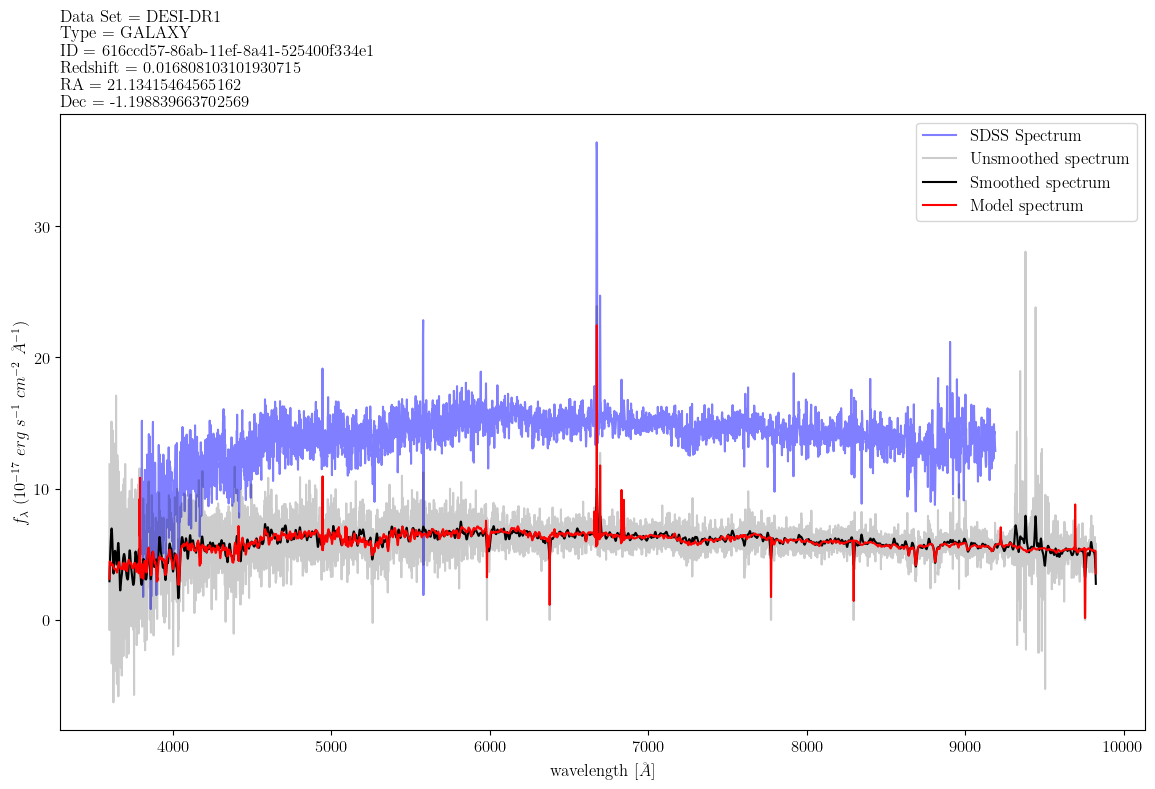

In [43]:
plt.plot(lamb, flux, color='blue', alpha=0.5, label='SDSS Spectrum')
plot_spec(index=1, results=results_I)


In [44]:
# # Plot a couple
# f, ax = plt.subplots() 

# ax.step(specs[0].spectral_axis, specs[0].flux) 
# ax.step(specs[1].spectral_axis, specs[1].flux)
# plt.show()